In [1]:
import pandas as pd
import zipfile
import pymongo
from pymongo import MongoClient
import chardet
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
from flask import Flask, jsonify

In [3]:
#Importing data
#Questions to answer:
#Who is the goat? Who has the highest average similarity score for all jobs?
#Who is best fit for a job?

jobs_import=pd.read_csv('data job posts/data job posts.csv',encoding = "utf-8")
resume_import=pd.read_csv('UpdatedResumeDataSet - Copy.csv',engine="python", encoding="utf-8")
# #Why won't you give me the correct formatting????
# path = 'UpdatedResumeDataSet - Copy.csv'
# with open(path, mode='rb') as f:
#     binary = f.read()
#     code = chardet.detect(binary)['encoding']
#     print(code)

In [ ]:
#Remove all non utf-8 characters
resume_import_clean=resume_import.replace('[^a-zA-Z\d\_.]+',' ',regex=True)
jobs_import_clean=jobs_import.replace('[^a-zA-Z\d\_.]+',' ',regex=True)

In [27]:
jobs_import_clean_dropped = jobs_import_clean.dropna(subset=['Location'])
jobs_import_clean_dropped["Location"].sort_values()

450              40 Marshal Bagramian Ave. Yerevan Armenia
3197                        49 Tigran Metsi Ave. 6th floor
1434     52 Abovyan Str. 3 rd floor room 305 Yerevan Ar...
1433     52 Abovyan Str. 3 rd floor room 305 Yerevan Ar...
2157                                      Abkhasia Georgia
                               ...                        
17203    v. Vardadzor Martakert region Republic of Nago...
17202    v. Vardadzor Martakert region Republic of Nago...
17201    v. Vardadzor Martakert region Republic of Nago...
17200    v. Vardadzor Martakert region Republic of Nago...
17198    v. Vardadzor Martakert region Republic of Nago...
Name: Location, Length: 18969, dtype: object

In [15]:
for col in jobs_import_clean.columns:
    print(col)

jobpost
date
Title
Company
AnnouncementCode
Term
Eligibility
Audience
StartDate
Duration
Location
JobDescription
JobRequirment
RequiredQual
Salary
ApplicationP
OpeningDate
Deadline
Notes
AboutC
Attach
Year
Month
IT


In [39]:
# use cosign similary to see how similar all job postings are to other job postings
post=jobs_import_clean.dropna(subset=['JobDescription'])
post


,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company JOB TITLE...,Jan 5 2004,Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,To apply for this position please submit a cov...,NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
2,Caucasus Environmental NGO Network CENN JOB TI...,Jan 7 2004,Country Coordinator,Caucasus Environmental NGO Network CENN,NaN,NaN,NaN,NaN,NaN,Renewable annual contract POSITION,...,NaN,Please send resume or CV toursula.kazarian ......,NaN,20 January 2004 START DATE February 2004,NaN,The Caucasus Environmental NGO Network is a no...,NaN,2004,1,False
3,Manoff Group JOB TITLE BCC Specialist POSITION...,Jan 7 2004,BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy Pea...,NaN,23 January 2004 START DATE Immediate,NaN,NaN,NaN,2004,1,False
5,Boutique Appollo JOB TITLE Saleswoman POSITION...,Jan 10 2004,Saleswoman,Boutique Appollo,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,For further information please contact Irina N...,NaN,01 February 2004,NaN,NaN,NaN,2004,1,False
6,OSI Assistance Foundation Armenian Branch Offi...,Jan 11 2004,Chief Accountant Finance Assistant,OSI Assistance Foundation Armenian Branch Office,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,For submission of applications CVs please cont...,NaN,16 January 2004 6 00 pm.,NaN,NaN,NaN,2004,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18992,Macadamian AR CJSC TITLE .NET Developer LOCATI...,Dec 25 2015,.NET Developer,Macadamian AR CJSC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,To apply for this position please email your C...,25 December 2015,24 January 2016,NaN,Macadamian AR is a global software development...,NaN,2015,12,True
18995,Transport PIU State Institution of the RA Min...,Dec 24 2015,Deputy Director,Transport PIU State Institution of the RA Min...,NaN,NaN,All interested and qualified candidates.,NaN,As soon as possible.,Long term with a probation period of 3 months.,...,Commensurate with skills and experience.,Interested candidates are asked to submit the ...,25 December 2015,24 January 2016 17 00 p.m.,NaN,The Transport PIU SI PIU of the RA Ministry of...,NaN,2015,12,False
18996,Technolinguistics NGO TITLE Senior Creative UX...,Dec 28 2015,Senior Creative UX UI Designer,Technolinguistics NGO,NaN,Full time,NaN,NaN,NaN,Long term,...,Competitive,To apply for this position please send your de...,29 December 2015,28 January 2016,NaN,As a company Technolinguistics has a mandate t...,NaN,2015,12,False
18999,San Lazzaro LLC TITLE Head of Online Sales Dep...,Dec 30 2015,Head of Online Sales Department,San Lazzaro LLC,NaN,NaN,NaN,NaN,NaN,Long term,...,Highly competitive,Interested candidates can send their CVs to i....,30 December 2015,29 January 2016,NaN,San Lazzaro LLC works with several internation...,NaN,2015,12,False


In [40]:
cv = CountVectorizer()

In [42]:
matrix = cv.fit_transform(post)
# cosine_sim = cosine_similarity(count_matrix)

In [43]:
matrix

<24x24 sparse matrix of type '<class 'numpy.int64'>'
	with 24 stored elements in Compressed Sparse Row format>

In [44]:
counts = pd.DataFrame(matrix.toarray(),
                      columns=cv.get_feature_names())
counts

,aboutc,announcementcode,applicationp,attach,audience,company,date,deadline,duration,eligibility,...,location,month,notes,openingdate,requiredqual,salary,startdate,term,title,year
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# use cosign similary to see how similar all resumes are to other resumes
resume_desc=resume_import_clean['Resume']
count_matrix_resume = cv.fit_transform(resume_desc)
cosine_sim_resume = cosine_similarity(count_matrix_resume)


In [10]:
#stack job posts in same column as resume in data frame so that cosign similarity of everything can be determined
job_resume_stack=pd.concat([resume_desc,post],ignore_index=True)
job_resume_stackdf=pd.DataFrame(job_resume_stack)


In [11]:
#Calculate cosign similarity of everything
job_resume_stack_info=job_resume_stackdf.iloc[:,0]
count_matrix_stack = cv.fit_transform(job_resume_stack_info)
cosine_sim_stack = cosine_similarity(count_matrix_stack)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000252315A7898>,
      dtype=object)

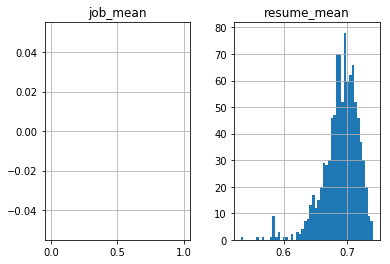

In [28]:
# make sure the stack is a data frame
cosine_sim_stackdf=pd.DataFrame(cosine_sim_stack)
#Create stack dataframe to hold stats
stack=pd.DataFrame()
# Add mean cosign similarity of every row into a column named "mean"
cosine_sim_stackdf['mean']=cosine_sim_stackdf.mean(axis=1)
#Comaring resumes to jobs
stack['resume_mean']=cosine_sim_stackdf.iloc[19002:,:19002].mean(axis=1)
#comparing all jobs to jobs
#Not sure why job_mean doesn't plot here. Can be corrected by taking out on of the historgrams.
stack['job_mean']=cosine_sim_stackdf.iloc[0:19001,0:19001].mean(axis=1)
stack.hist(bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000252318D5DA0>,
      dtype=object)

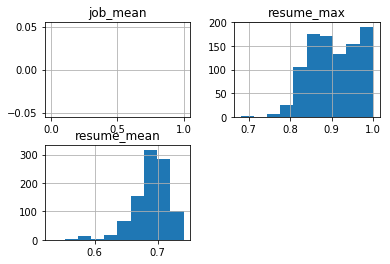

In [29]:
stack['resume_max']=cosine_sim_stackdf.iloc[19002:,:19002].max(axis=1)
stack.hist()

In [51]:
#Who is the best fit for specific job?
like_a_glove=stack[stack['resume_max']>.999]
like_a_glove

,resume_mean,job_mean,resume_max
19040,0.712837,NaN,0.999586
19045,0.716368,NaN,0.999449
19266,0.684906,NaN,0.999263
19641,0.717245,NaN,0.999021


In [38]:
#highers average similary score doesn't have the highest max similarity.  May need to look by job description
cosine_simdf=pd.DataFrame(cosine_sim)
goat=stack[stack['resume_mean']>.74]
goat

,resume_mean,job_mean,resume_max
19308,0.741292,NaN,0.915805
19875,0.740877,NaN,0.955529


In [52]:
#This mf'r has a background in cosign similarity projects and also has the highest resume to job similarity!!!!
resume_desc.iloc[38]

'Personal Skills Ability to quickly grasp technical aspects and willingness to learn High energy levels Result oriented. Education Details January 2018 Master of Engineering Computer Technology Application Bhopal Madhya Pradesh Truba Institute of Engineering Information Technology January 2010 B.E. computer science Bhopal Madhya Pradesh RKDF Institute of Science and Technology College of Engineering January 2006 Polytechnic Information Technology Vidisha Madhya Pradesh SATI Engineering College in Vidisha January 2003 M.tech Thesis Detail BMCH School in Ganj basoda Data science I have six month experience in Data Science. Key Skills Experience in Machine Learning Deep Leaning NLP Python SQL Web Scraping Good knowledge in computer subjects and ability to update Skill Details Experience in Machine Learning Deep Learning NLP Python SQL Web Crawling HTML CSS. Exprience Less than 1 year monthsCompany Details company RNT.AI Technology Solution description Text classification using Machine lea

In [13]:
A=jobs_import_clean.to_dict('records')
B=resume_import_clean.to_dict('records')
B[0]

{'Category': 'Data Science',
 'Resume': 'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery. Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets. Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3.js DC.js Plotly kibana matplotlib ggplot Tableau. Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning.Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology 

In [14]:
#Combine data into mongodb
conn = "mongodb://localhost:27017"
client = pymongo.MongoClient(conn)

In [15]:
#set up tables in db
db = client.job_resume
resume = db.resume
job=db.job

In [16]:
#insert data to tables
job.insert_many(A)
resume.insert_many(B)

In [17]:
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'job_resume')